In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('Dataset/train.csv')
test = pd.read_csv('Dataset/test.csv')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


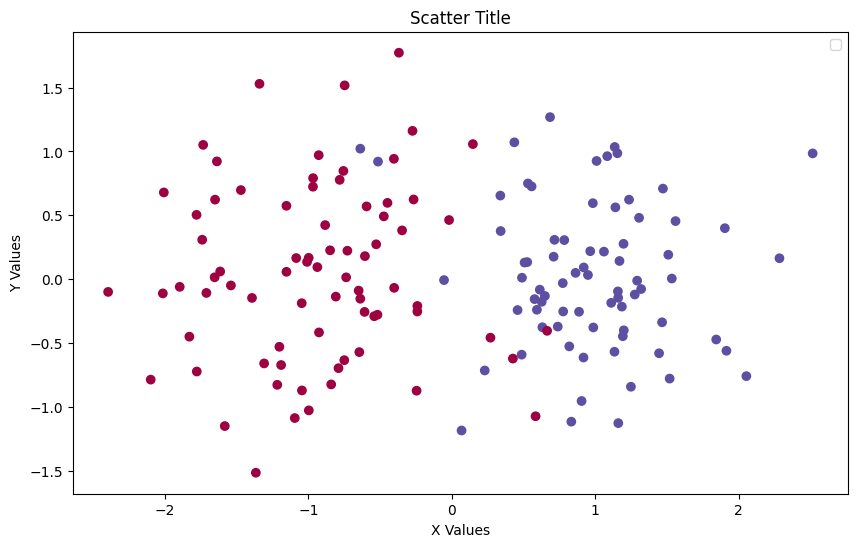

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(train['x1'], train['x2'], c=train['target'], cmap=plt.cm.Spectral)

plt.xlabel('X Values')
plt.ylabel('Y Values')

plt.title('Scatter Title')
plt.legend()
plt.show()


In [4]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.pocket = 0
        self.pocket_weights = None
        self.pocket_bias = None

    def fit(self, X, y):
        n_samples = X.shape[0]
        n_features = X.shape[1]
        
        self.weights = np.zeros(n_features)
        self.bias = 0


        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                if y_predicted == y[idx]:
                    update = 0
                elif y_predicted == 0 and y[idx] == 1:
                    update = self.learning_rate * x_i
                elif y_predicted == 1 and y[idx] == 0:
                    update = -self.learning_rate * x_i

                self.weights += update 

        newacc = np.sum(self.predict(X) == y) / len(y)
        if newacc > self.pocket:
            self.pocket = newacc
            self.pocket_weights = self.weights
            self.pocket_bias = self.bias
        


    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def activation_func(self, x):
        return np.where(x >= 0, 1, 0)
        

In [5]:
solution = Perceptron(learning_rate=0.01, n_iters=1000)
solution.fit(train[['x1', 'x2']].values, train['target'].values)
y_hat = solution.predict(train[['x1', 'x2']].values)


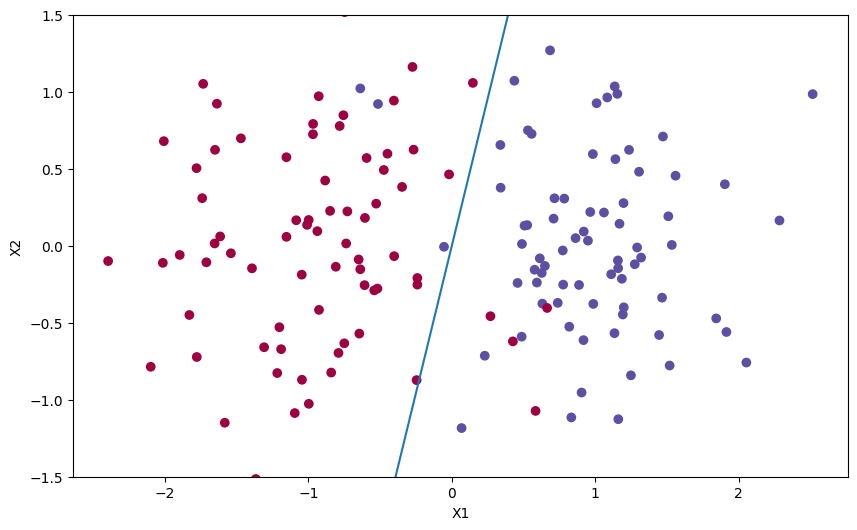

In [6]:
def plot_hyperplane(X, Y, weights, bias):

    m = - weights[0]/weights[1]
    b = - bias/weights[1]
    xPlane = np.linspace(-1,2,5)
    yPlane = m * xPlane + b
    plt.figure(figsize=(10,6))
    plt.ylim([-1.5, 1.5])
    plt.scatter(X['x1'], X['x2'], c=Y, cmap=plt.cm.Spectral)
    plt.plot(xPlane, yPlane, '-')
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()
    

plot_hyperplane(train, train['target'], solution.weights,solution.bias )

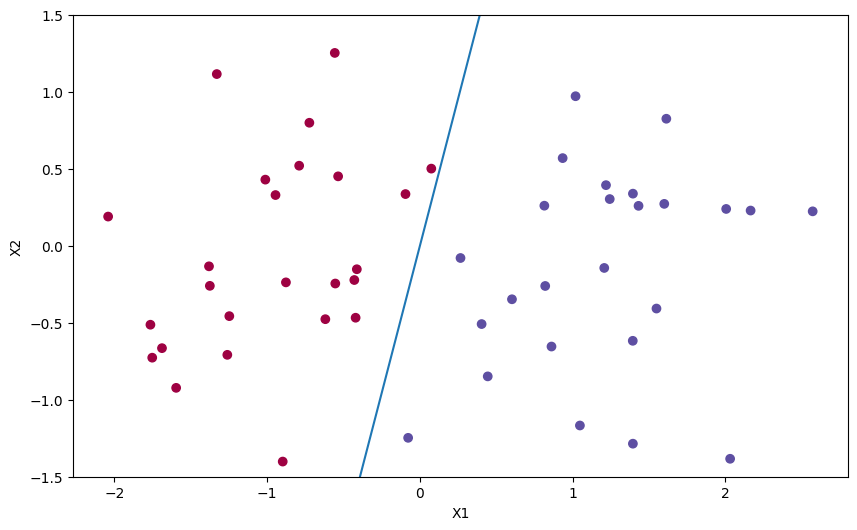

In [7]:
y_hat = solution.predict(test[['x1', 'x2']].values)
plot_hyperplane(test, y_hat, solution.weights,solution.bias )